In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
def searchWindows(spectra_list,window,threshold, molecules):
    start,end=0,0
    for n in range(len(spectra_list)):
        start+=spectra_list[n].iloc[0,0]
        end+=spectra_list[n].iloc[-1,0]
    start=start/len(spectra_list)
    end=end/len(spectra_list)
    collection=[]
    for i in range(int((end-start)/window)):
        w=start+i*window
        sum_list=[]
        max_sum=0
        for spectrum in spectra_list:
            sum_list.append(spectrum['sw'].loc[(spectrum['nu']>=w) & (spectrum['nu']<w+window)].sum())
        
        max_sum=np.max(sum_list)
        criteria_met=True
        for j in range(len(sum_list)):
            sum_list[j]=sum_list[j]/max_sum
            if sum_list[j]<threshold:
                criteria_met=False
        sum_list = ["%.2f" % number for number in sum_list]
        coefs_list=[item for item in zip(molecules,sum_list)]
        print(coefs_list)
        if criteria_met:
            collection.append((w,w+window))
    return collection

In [152]:
spectra=pd.read_csv('data/1520_1550.txt', sep='\t')
spectra['nm']=10000000/spectra['nu']
h2o=spectra.loc[spectra['global_iso_id']==1,['nm','nu','sw']]
h2o.reset_index(drop=True, inplace=True)
h2s=spectra.loc[spectra['global_iso_id']==81,['nm','nu','sw']]
h2s.reset_index(drop=True, inplace=True)
co2=spectra.loc[spectra['global_iso_id']==7,['nm','nu','sw']]
co2.reset_index(drop=True, inplace=True)

In [153]:
spectra.head()
len(h2o)

919

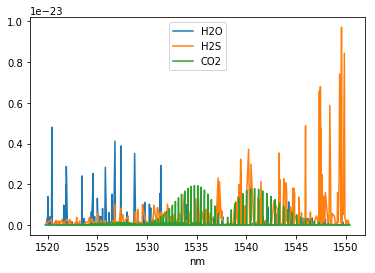

<Figure size 4320x360 with 0 Axes>

In [154]:
fig, ax = plt.subplots()
plt.figure(figsize=(60,5))
ax.plot(h2o['nm'],h2o['sw'],label='H2O')
ax.plot(h2s['nm'],h2s['sw'],label='H2S')
ax.plot(co2['nm'],co2['sw'],label='CO2')
ax.legend(loc='upper center')
#ax.set(xlim=(6450, 6550))
ax.set_xlabel('nm')
#plt.yscale('log')
plt.show()

In [137]:
spectra_list=[h2o]+[h2s]+[co2]
spectra_list[0].head()

,nu,sw
0,6450.0297,1.423000e-29
1,6450.0677,4.971000e-29
2,6450.2562,4.674000e-28
3,6450.3075,2.184000e-28
4,6450.4028,3.333000e-27


In [138]:
start,end=0,0
for n in range(len(spectra_list)):
    start+=spectra_list[n].iloc[0,0]
    end+=spectra_list[n].iloc[-1,0]
start=start/len(spectra_list)
end=end/len(spectra_list)
start,end

(6450.066271999999, 6579.776291333333)

In [139]:
window=120
threshold=0.1
molecules=['H2O','H2S', 'CO2']
searchWindows(spectra_list,window,threshold, molecules)

[('H2O', '0.32'), ('H2S', '1.00'), ('CO2', '0.31')]


[(6450.066271999999, 6570.066271999999)]

In [110]:
mol=['a','b','c']
val=[1,2,3]
for item in zip(mol,val):
    print(item)

('a', 1)
('b', 2)
('c', 3)
